<a href="https://colab.research.google.com/github/gvalexis/cagv_pcd/blob/main/Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import ngrams
import requests
from bs4 import BeautifulSoup
from nltk.stem.snowball import SnowballStemmer
import numpy as np
import kagglehub
import math
import seaborn as sns
import itertools
from sklearn.cluster import KMeans
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
path = kagglehub.dataset_download("abdallahwagih/spam-emails")
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import pandas as pd
df_spam_ham = pd.read_csv("/root/.cache/kagglehub/datasets/abdallahwagih/spam-emails/versions/1/spam.csv")
df_spam_ham.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df_spam_ham['word']=df_spam_ham['Message'].apply(lambda x: len(x.split()))
df_spam_ham['char']=df_spam_ham['Message'].apply(lambda x: len(x))
df_spam_ham['special_char']=df_spam_ham['Message'].apply(lambda x: len(re.findall("[^@\"',./?!&%$#*(){}[\]:;<>\\|`~^_+=-]",x)))
df_spam_ham['numbers']=df_spam_ham['Message'].apply(lambda x: len(re.findall("\d",x)))
df_spam_ham['special_char2']=df_spam_ham['char']-df_spam_ham['special_char']
df_spam_ham['category']=df_spam_ham['Category'].apply(lambda x: 1 if x=='spam' else 0)

In [ ]:
df_spam_ham.sample(15)

,Category,Message,word,char,special_char,numbers,special_char2,category
4288,ham,I wud never mind if u dont miss me or if u don...,32,139,123,0,16,0
5004,spam,CDs 4u: Congratulations ur awarded £500 of CD ...,26,165,161,23,4,1
4176,ham,How are you doing. How's the queen. Are you go...,14,71,68,0,3,0
2571,ham,From 5 to 2 only my work timing.,8,32,31,2,1,0
3529,spam,You are a £1000 winner or Guaranteed Caller Pr...,23,149,146,25,3,1
3210,ham,Havent mus ask if u can 1st wat. Of meet 4 lun...,34,134,131,4,3,0
1956,ham,"Aight I'll grab something to eat too, text me ...",14,68,65,0,3,0
3033,ham,Jokin only lar... :-) depends on which phone m...,13,69,60,0,9,0
3590,ham,I've sent my wife your text. After we buy them...,26,123,117,0,6,0
703,ham,What is important is that you prevent dehydrat...,13,77,77,0,0,0


In [ ]:
df_spam_ham=df_spam_ham[['Message', 'word', 'char', 'special_char2','numbers', 'category']]
df_ham = df_spam_ham[df_spam_ham['category'] == 0]
df_spam = df_spam_ham[df_spam_ham['category'] == 1]

In [ ]:
df_spam_ham.sample(15)

,Message,word,char,special_char2,numbers,category
3726,Nothing spl..wat abt u and whr ru?,7,34,3,0,0
4027,Oh ok.. Wat's ur email?,5,23,4,0,0
2264,Not heard from U4 a while. Call 4 rude chat pr...,33,160,3,23,1
4346,Enjoy urself tmr...,3,19,3,0,0
4131,And by when you're done I mean now,8,34,1,0,0
3944,I got a call from a landline number. . . I am ...,27,106,6,0,0
1122,Do you want 750 anytime any network mins 150 t...,29,153,0,17,1
3572,But you dint in touch with me.,7,30,1,0,0
4369,1 I don't have her number and 2 its gonna be a...,26,121,3,2,0
194,It will stop on itself. I however suggest she ...,22,111,2,0,0


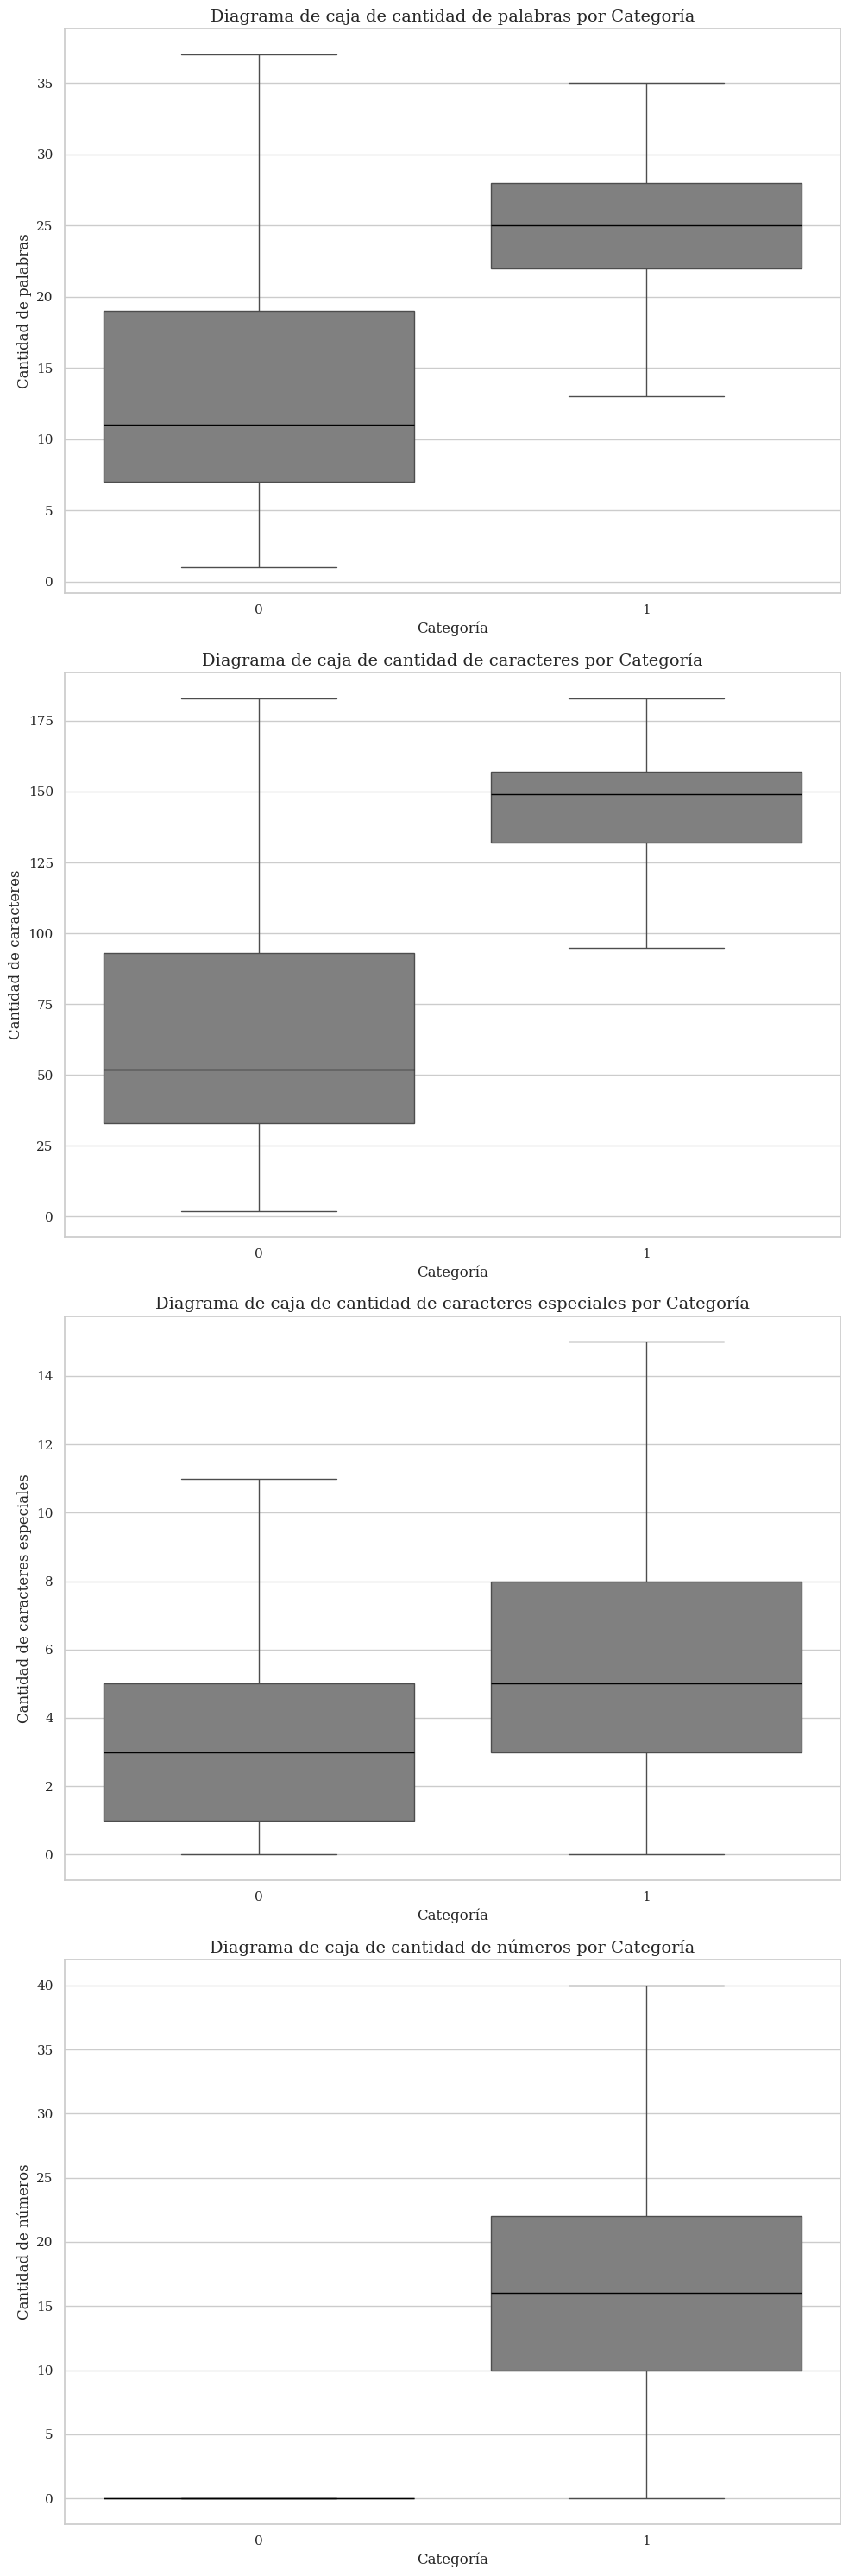

In [ ]:
df = pd.DataFrame(df_spam_ham)
sns.set(style="whitegrid")

plt.rc('font', family='Serif')

df = pd.DataFrame(df_spam_ham)

fig, axes = plt.subplots(4, 1, figsize=(10, 30))

PROPS = {'medianprops':{'color':'black'}}
sns.boxplot(x='category', y='word', data=df, ax=axes[0], showfliers=False, color='gray',**PROPS)
axes[0].set_title('Diagrama de caja de cantidad de palabras por Categoría', fontsize=14, fontname='Serif')
axes[0].set_xlabel('Categoría', fontsize=12, fontname='Serif')
axes[0].set_ylabel('Cantidad de palabras', fontsize=12, fontname='Serif')

sns.boxplot(x='category', y='char', data=df, ax=axes[1], showfliers=False, color='gray',**PROPS)
axes[1].set_title('Diagrama de caja de cantidad de caracteres por Categoría', fontsize=14, fontname='Serif')
axes[1].set_xlabel('Categoría', fontsize=12, fontname='Serif')
axes[1].set_ylabel('Cantidad de caracteres', fontsize=12, fontname='Serif')

sns.boxplot(x='category', y='special_char2', data=df, ax=axes[2], showfliers=False, color='gray',**PROPS)
axes[2].set_title('Diagrama de caja de cantidad de caracteres especiales por Categoría', fontsize=14, fontname='Serif')
axes[2].set_xlabel('Categoría', fontsize=12, fontname='Serif')
axes[2].set_ylabel('Cantidad de caracteres especiales', fontsize=12, fontname='Serif')

sns.boxplot(x='category', y='numbers', data=df, ax=axes[3], showfliers=False, color='gray',**PROPS)
axes[3].set_title('Diagrama de caja de cantidad de números por Categoría', fontsize=14, fontname='Serif')
axes[3].set_xlabel('Categoría', fontsize=12, fontname='Serif')
axes[3].set_ylabel('Cantidad de números', fontsize=12, fontname='Serif')

plt.savefig('boxplot.pdf', format='pdf')
plt.tight_layout()
plt.show()

Accuracy for ('word', 'char'): 0.7867910983488873
Confusion Matrix for ('word', 'char'):
[[3713 1112]
 [  76  671]]
Accuracy for ('word', 'special_char2'): 0.7634601579325198
Confusion Matrix for ('word', 'special_char2'):
[[3631 1194]
 [ 124  623]]
Accuracy for ('word', 'numbers'): 0.7876884422110553
Confusion Matrix for ('word', 'numbers'):
[[3730 1095]
 [  88  659]]
Accuracy for ('char', 'special_char2'): 0.7884063173007897
Confusion Matrix for ('char', 'special_char2'):
[[3723 1102]
 [  77  670]]
Accuracy for ('char', 'numbers'): 0.7887652548456568
Confusion Matrix for ('char', 'numbers'):
[[3722 1103]
 [  74  673]]
Accuracy for ('special_char2', 'numbers'): 0.9635678391959799
Confusion Matrix for ('special_char2', 'numbers'):
[[4802   23]
 [ 180  567]]


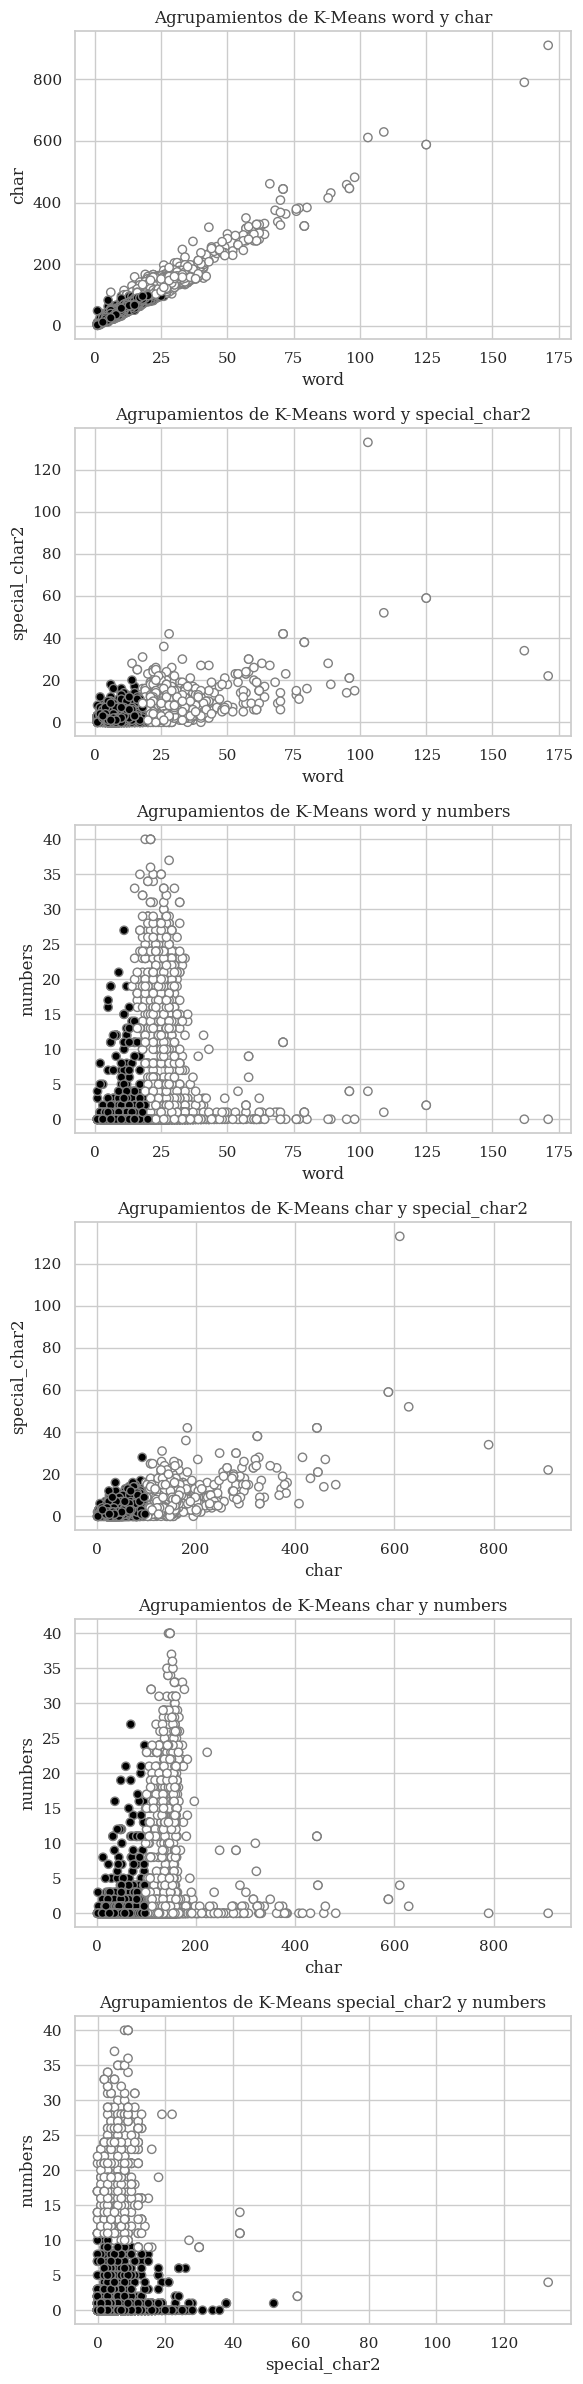

In [ ]:
df = df_spam_ham

variables = ['word', 'char', 'special_char2', 'numbers']
combinations = list(itertools.combinations(variables, 2))

fig, axs = plt.subplots(len(combinations), figsize=(len(combinations), len(combinations) * 4))

for i, combo in enumerate(combinations):
    X = df[list(combo)]

    kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
    df['cluster'] = kmeans.labels_

    ax = axs[i]
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df['cluster'], cmap='Greys_r', edgecolor='Grey')
    ax.set_xlabel(combo[0])
    ax.set_ylabel(combo[1])
    ax.set_title(f'Agrupamientos de K-Means {combo[0]} y {combo[1]}')

    kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
    df['predicted_cluster'] = kmeans.labels_
    cm = confusion_matrix(df['category'], df['predicted_cluster'])
    accuracy = accuracy_score(df['category'], df['predicted_cluster'])
    print(f'Accuracy for {combo}: {accuracy}')
    print(f'Confusion Matrix for {combo}:\n{cm}')

plt.tight_layout()
plt.savefig('kmeans.pdf', format='pdf')
plt.show()



In [ ]:

df = df_spam_ham

X = df[['word', 'char', 'special_char2', 'numbers']]
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8084 - loss: 0.4711 - val_accuracy: 0.9608 - val_loss: 0.1300
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9733 - loss: 0.0908 - val_accuracy: 0.9664 - val_loss: 0.1226
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9764 - loss: 0.0737 - val_accuracy: 0.9630 - val_loss: 0.1216
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9771 - loss: 0.0806 - val_accuracy: 0.9630 - val_loss: 0.1222
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9764 - loss: 0.0760 - val_accuracy: 0.9652 - val_loss: 0.1180
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9745 - loss: 0.0854 - val_accuracy: 0.9664 - val_loss: 0.1190
Epoch 7/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9780 - loss: 0.0731 - val_accuracy: 0.9641 - val_loss: 0.1156
Epoch 8/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9754 - loss: 0.0734 - val_accuracy: 0.9664 - val_

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9758 - loss: 0.0736
Accuracy: 0.9757847785949707


In [ ]:
df = df_spam_ham

X = df[['word', 'char', 'special_char2', 'numbers']]
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9154 - loss: 0.2817 - val_accuracy: 0.9641 - val_loss: 0.1204
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9754 - loss: 0.0875 - val_accuracy: 0.9652 - val_loss: 0.1181
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9711 - loss: 0.0877 - val_accuracy: 0.9619 - val_loss: 0.1165
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9739 - loss: 0.0800 - val_accuracy: 0.9608 - val_loss: 0.1155
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9751 - loss: 0.0742 - val_accuracy: 0.9630 - val_loss: 0.1176
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9796 - loss: 0.0660 - val_accuracy: 0.9652 - val_loss: 0.1130
Epoch 7/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9751 - loss: 0.0721 - val_accuracy: 0.9608 - val_loss: 0.1133
Epoch 8/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9764 - loss: 0.0764 - val_accuracy: 0.9652 - val_

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9760 - loss: 0.0751 
Accuracy: 0.9775784611701965


In [ ]:



df = df_spam_ham
X = df[['word', 'char', 'special_char2', 'numbers']]
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

model = sm.Logit(y_train, X_train_scaled)
result = model.fit()

y_pred_prob = result.predict(X_test_scaled)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.089440
         Iterations 9
Accuracy: 0.968609865470852
Confusion Matrix:
[[958   8]
 [ 27 122]]
                           Logit Regression Results                           
Dep. Variable:               category   No. Observations:                 4457
Model:                          Logit   Df Residuals:                     4452
Method:                           MLE   Df Model:                            4
Date:                Wed, 29 Jan 2025   Pseudo R-squ.:                  0.7731
Time:                        15:22:54   Log-Likelihood:                -398.64
converged:                       True   LL-Null:                       -1757.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7469      0.114    -24